In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

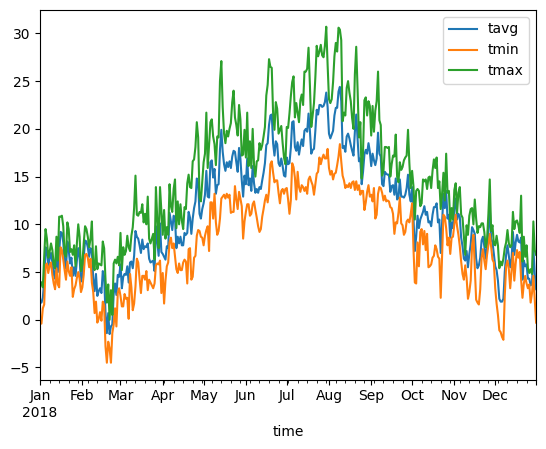

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('country_coordinates_manual.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    # Create Point for each location
    location = Point(row['latitude'], row['longitude'], row['elevation'])

    # Get daily data for 2018
    data = Daily(location, start, end)
    data = data.fetch()

    # Plot line chart including average, minimum and maximum temperature
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title(f"Weather Data for {row['location_name']}")
    plt.show()

KeyError: 'latitude'

In [4]:
print(coordinates.columns)

Index(['Country', 'Latitude', 'Longitude'], dtype='object')


No valid temperature data for Afghanistan.
No valid temperature data for Albania.
No valid temperature data for Algeria.


No valid temperature data for Andorra.
No valid temperature data for Angola.
No valid temperature data for Argentina.


No valid temperature data for Armenia.
No valid temperature data for Australia.


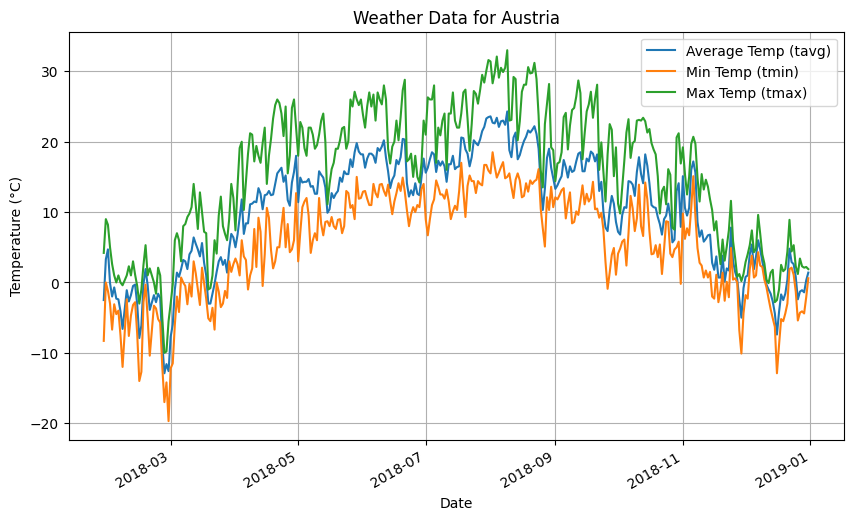

No valid temperature data for Azerbaijan.


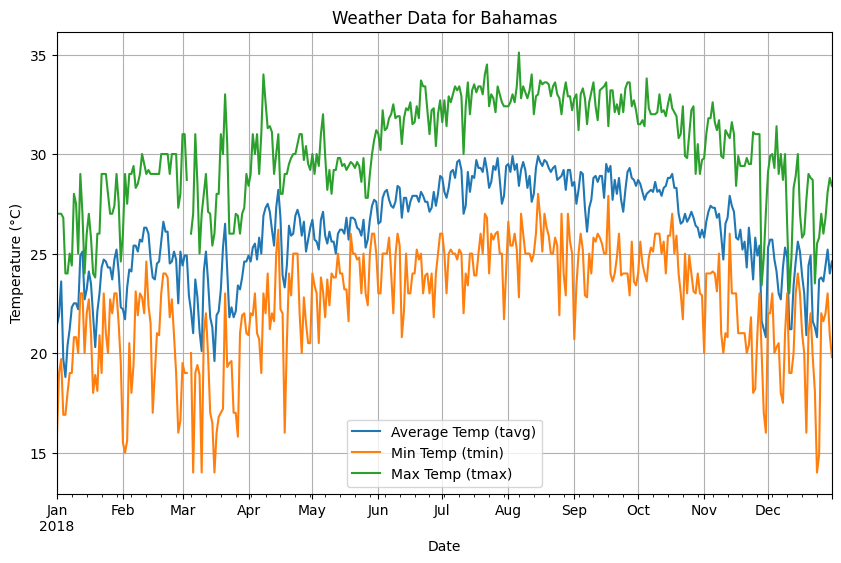

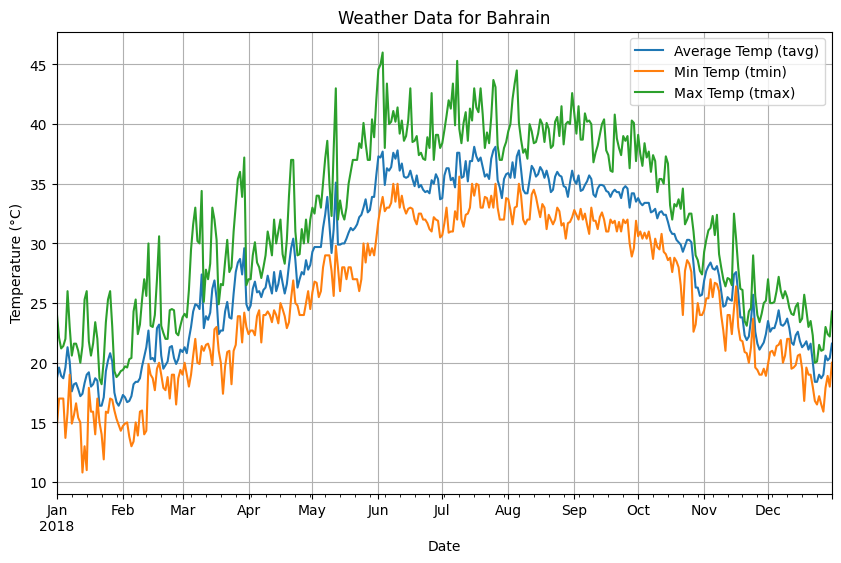

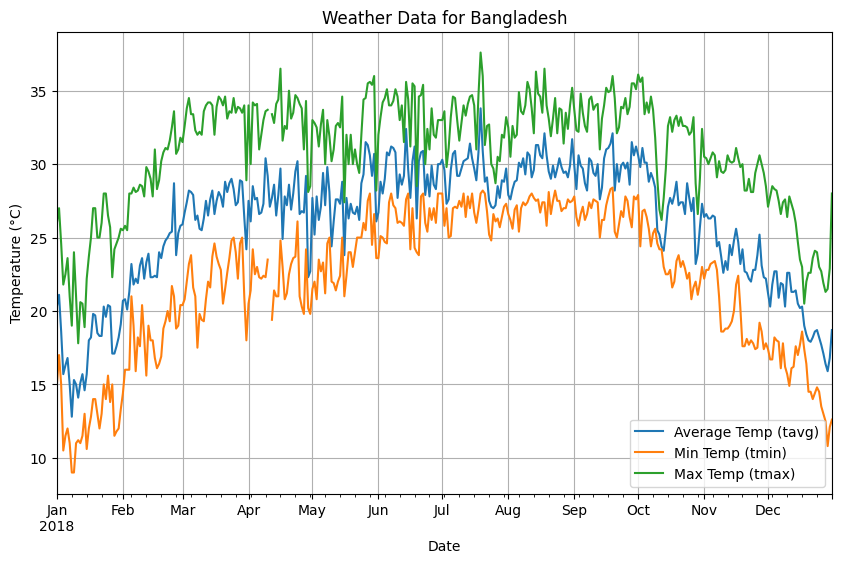

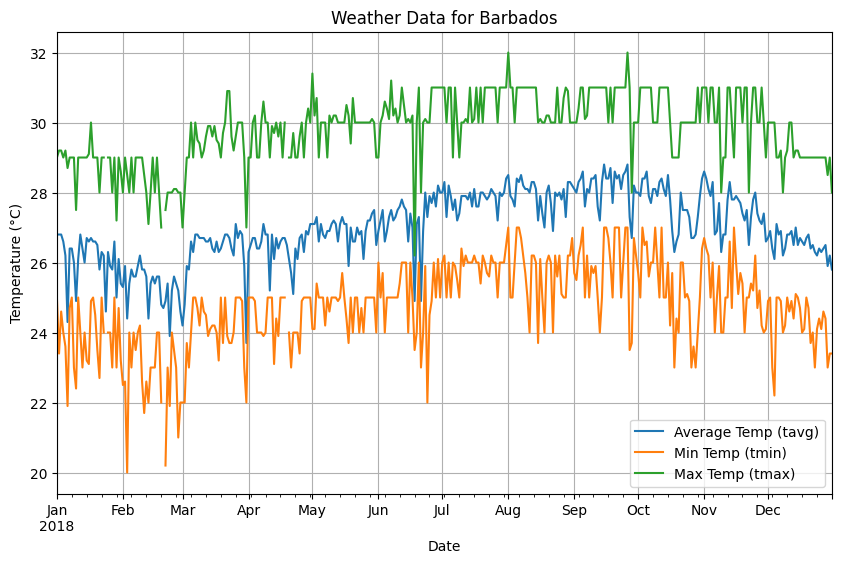

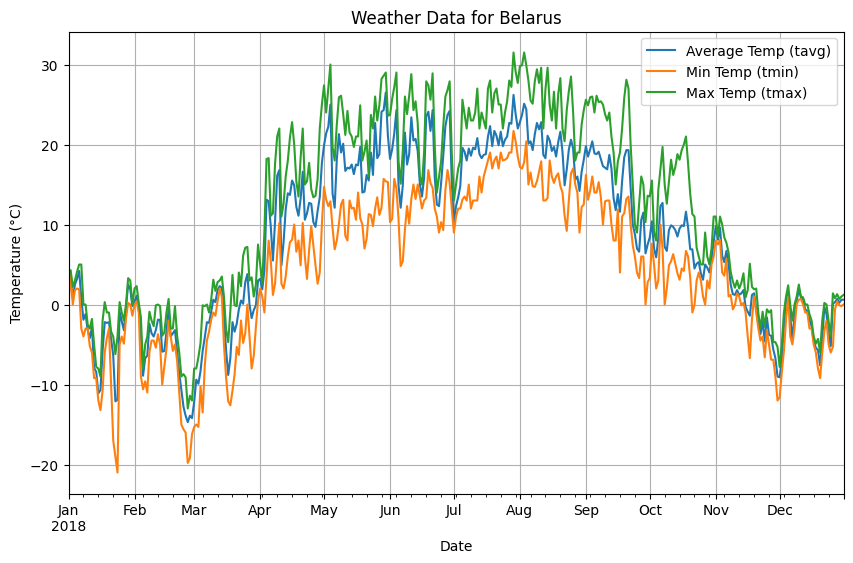

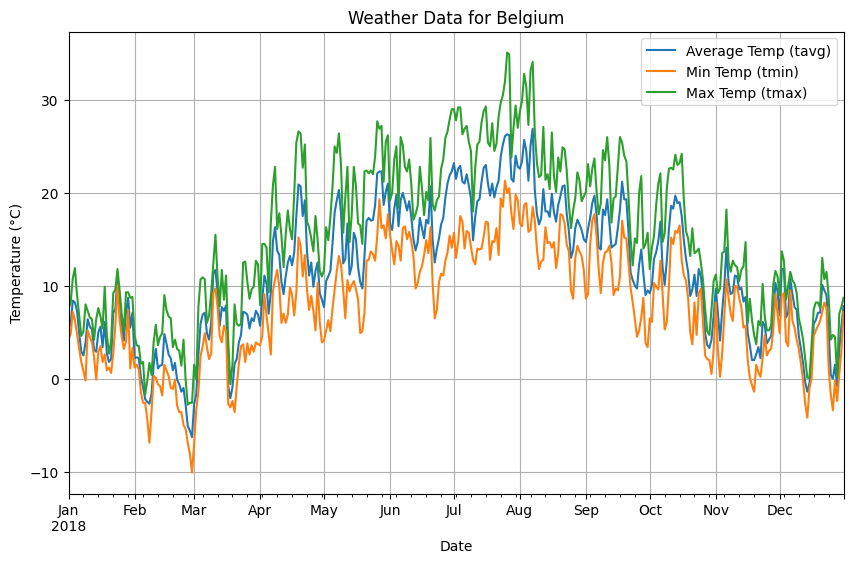

No valid temperature data for Belize.


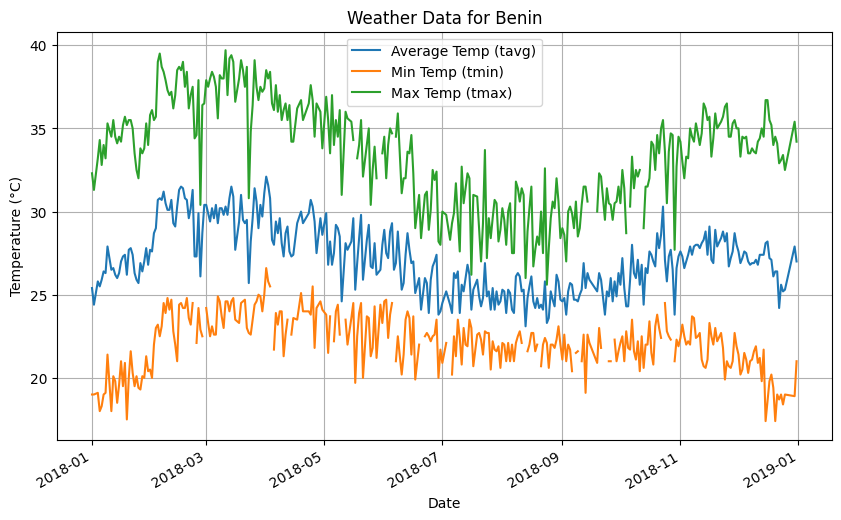

No valid temperature data for Bhutan.
No valid temperature data for Bolivia.


In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('country_coordinates_manual.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

for index, row in coordinates.iterrows():
    try:
        # Create Point for each location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch daily data for 2018
        data = Daily(location, start, end)
        data = data.fetch()

        # Check and convert temperature columns to numeric
        if all(col in data.columns for col in ['tavg', 'tmin', 'tmax']):
            data[['tavg', 'tmin', 'tmax']] = data[['tavg', 'tmin', 'tmax']].apply(pd.to_numeric, errors='coerce')
            
            # Drop rows where all three temperature columns are NaN
            data = data.dropna(subset=['tavg', 'tmin', 'tmax'], how='all')
            
            if not data.empty:
                data.plot(y=['tavg', 'tmin', 'tmax'], figsize=(10, 6))
                plt.title(f"Weather Data for {row['Country']}")
                plt.xlabel("Date")
                plt.ylabel("Temperature (°C)")
                plt.legend(['Average Temp (tavg)', 'Min Temp (tmin)', 'Max Temp (tmax)'])
                plt.grid(True)
                plt.show()
            else:
                print(f"No valid temperature data for {row['Country']}.")
        else:
            print(f"Required columns missing for {row['Country']}. Data columns: {data.columns}")
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")

In [ ]:
import requests
import pandas as pd

url = "https://restcountries.com/v3.1/all"

response = requests.get(url)
data = response.json()

countries = []
for country in data:
    try:
        name = country["name"]["common"]
        capital = country["capital"][0] if "capital" in country and country["capital"] else None
        area = country["area"]
        latlng = country["latlng"]
        countries.append({"Country": name, "Capital": capital, "Area_km2": area, "Latitude": latlng[0], "Longitude": latlng[1]})
    except KeyError:
        continue

countries_df = pd.DataFrame(countries)

countries_df.to_csv("countries_with_coordinates.csv", index=False)

print(countries_df.head())

         Country            Capital  Area_km2   Latitude  Longitude
0  South Georgia  King Edward Point    3903.0 -54.500000 -37.000000
1        Grenada       St. George's     344.0  12.116667 -61.666667
2    Switzerland               Bern   41284.0  47.000000   8.000000
3   Sierra Leone           Freetown   71740.0   8.500000 -11.500000
4        Hungary           Budapest   93028.0  47.000000  20.000000


In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('countries_with_coordinates.csv')

print(coordinates)

# # Set time period
# start = datetime(2018, 1, 1)
# end = datetime(2018, 12, 31)

# for index, row in coordinates.iterrows():
#     try:
#         # Create Point for each location
#         location = Point(row['Latitude'], row['Longitude'])

#         # Fetch daily data for 2018
#         data = Daily(location, start, end)
#         data = data.fetch()

#         # Check and convert temperature columns to numeric
#         if all(col in data.columns for col in ['tavg', 'tmin', 'tmax']):
#             data[['tavg', 'tmin', 'tmax']] = data[['tavg', 'tmin', 'tmax']].apply(pd.to_numeric, errors='coerce')
            
#             # Drop rows where all three temperature columns are NaN
#             data = data.dropna(subset=['tavg', 'tmin', 'tmax'], how='all')
            
#             if not data.empty:
#                 data.plot(y=['tavg', 'tmin', 'tmax'], figsize=(10, 6))
#                 plt.title(f"Weather Data for {row['Country']}")
#                 plt.xlabel("Date")
#                 plt.ylabel("Temperature (°C)")
#                 plt.legend(['Average Temp (tavg)', 'Min Temp (tmin)', 'Max Temp (tmax)'])
#                 plt.grid(True)
#                 plt.show()
#             else:
#                 print(f"No valid temperature data for {row['Country']}.")
#         else:
#             print(f"Required columns missing for {row['Country']}. Data columns: {data.columns}")
#     except Exception as e:
#         print(f"An error occurred while processing data for {row['Country']}: {e}")

           Country            Capital  Area_km2   Latitude   Longitude
0    South Georgia  King Edward Point    3903.0 -54.500000  -37.000000
1          Grenada       St. George's     344.0  12.116667  -61.666667
2      Switzerland               Bern   41284.0  47.000000    8.000000
3     Sierra Leone           Freetown   71740.0   8.500000  -11.500000
4          Hungary           Budapest   93028.0  47.000000   20.000000
..             ...                ...       ...        ...         ...
245        Belgium           Brussels   30528.0  50.833333    4.000000
246         Israel          Jerusalem   20770.0  31.470000   35.130000
247    New Zealand         Wellington  270467.0 -41.000000  174.000000
248      Nicaragua            Managua  130373.0  13.000000  -85.000000
249       Anguilla         The Valley      91.0  18.250000  -63.166667

[250 rows x 5 columns]


In [ ]:
import pandas as pd

countries_df = pd.read_csv('countries_with_coordinates.csv')

sorted_countries_df = countries_df.sort_values(by="Country")

sorted_file_path = "countries_sorted_alphabetically.csv"
sorted_countries_df.to_csv(sorted_file_path, index=False)

sorted_file_path

'countries_sorted_alphabetically.csv'

In [18]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('countries_sorted_alphabetically.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        location = Point(row['Latitude'], row['Longitude'])

        data = Daily(location, start, end)
        data = data.fetch()

        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        empty_row = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'time': pd.date_range(start=start, end=end)
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Convert date columns to datetime
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

print(weather_data)

weather_data.to_csv('weather_data.csv', index=False)

KeyboardInterrupt: 